In [1]:
!pip install autokeras  --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import autokeras as ak

2.8.0


In [3]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)  # Try only 1 model.(Increase accordingly)
# Feed the image classifier with training data.
clf.fit(X_train, y_train, validation_split=0.2, epochs=30)  # Change no of epochs to improve the model

Trial 1 Complete [00h 03m 47s]
val_loss: 0.2192549854516983

Best val_loss So Far: 0.2192549854516983
Total elapsed time: 00h 03m 47s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4266 - accuracy: 0.8472
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3107 - accuracy: 0.8893
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2798 - accuracy: 0.8988
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2594 - accuracy: 0.9054
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2432 - accuracy: 0.9113
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2333 - accuracy: 0.9147
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2226 - accuracy: 0.9185
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2158 - accuracy: 0.9209
Epoch 9/30
1

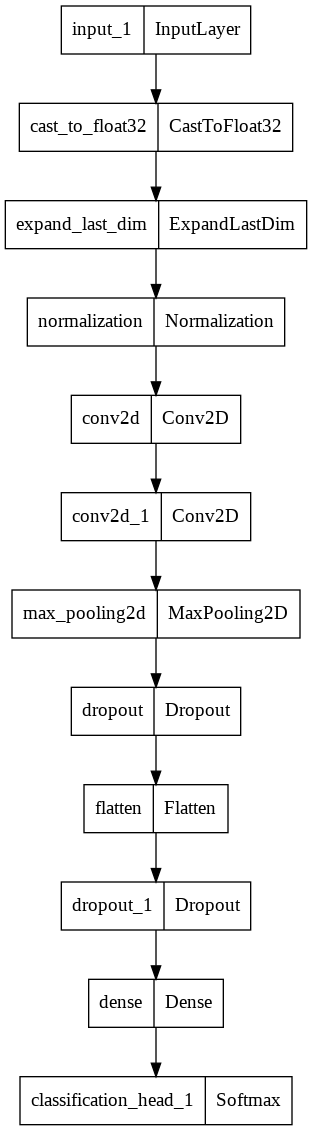

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(clf.export_model())

In [22]:
_, acc = clf.evaluate(X_test, y_test)
acc

313/313 [==============================] - 1s 3ms/step - loss: 0.2403 - accuracy: 0.9205


0.9204999804496765

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def compare_and_visualize(X_test, y_test, y_pred):
    plt.figure(figsize=(12,16))
    for i in range(30):
        plt.subplot(6,5,i+1)
        plt.imshow(X_test[i], cmap='gray', interpolation='none')
        plt.title("Label:{}\n Pred:{}".format(class_names[y_test[i]], class_names[int(y_pred[i][0])]))
        plt.axis('off')

1/1 [==============================] - 0s 12ms/step


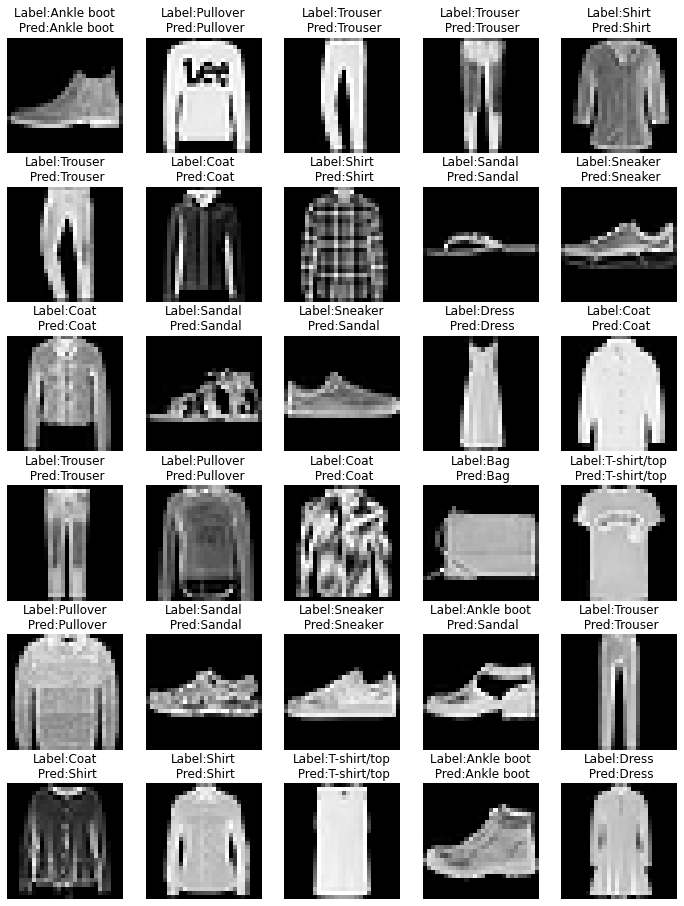

In [24]:
compare_and_visualize(X_test[:30], y_test[:30], clf.predict(X_test[:30]))